<a href="https://colab.research.google.com/github/ourekouch/global_press_analyzer/blob/master/News_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pandas
!pip install geopandas
!pip install descartes

In [3]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')
# Input data files are available in the "../input/" directory.
from subprocess import check_output
print(check_output(["ls", "/content/drive/My Drive/STAGE/DATA"]).decode("utf8"))
path="/content/drive/My Drive/STAGE/DATA/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
articles1.csv
articles2.csv
articles3.csv
Articles_.csv



In [4]:
import pandas as pd
dfs = []
dfs.append(pd.read_csv(path+'articles1.csv'))
dfs.append(pd.read_csv(path+'articles2.csv'))
dfs.append(pd.read_csv(path+'articles3.csv'))
# Concatenate all data into one DataFrame
articles3 = pd.concat(dfs, ignore_index=True)
articles3['url']=articles3['url'].fillna("lien non dispo")
articles3['content']=articles3['content'].fillna("contenu non dispo")
articles3.shape


(142570, 10)

In [5]:
articles=articles3.loc[0:10000 , ['id', 'title', 'publication','author','date','year','month','url','content'] ]
articles['language']="english"
articles['country']="USA"
articles.shape


(10001, 11)

In [6]:
def score_content(id, my_theme, content):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import linear_kernel
    result = []
    vectorizer = TfidfVectorizer(stop_words = "english", use_idf = True, smooth_idf = True)
    vectorizer.fit(content+my_theme)
    vector_list_contents = vectorizer.transform(content)
    vector_my_theme = vectorizer.transform(my_theme)
    result = linear_kernel(vector_my_theme, vector_list_contents)
    score=sum(result)/len(result)
    return score, id
def Recommendation(list_content, my_theme):
    themes_publishers = []
    for k in range(0, len(list_content['id'])):
        S = score_content(list_content['id'][k], my_theme, [list_content['content'][k]])
        themes_publishers.append(S[0][0])
    list_content['score']=themes_publishers 
    list_content.sort_values(by=["score"] , inplace=True , ascending = False )
    list2=list_content
    if(list_content.loc[list_content.index[0],"score"]< 0.001):
        print("Malheureusement, on n'a pas pu trouver une recommandation convenable\n")
        print("test2",list2[1:10])
    else:
      print("test2",list2[1:10])
      print("\nLes TOP articles traitants votre theme sont :\n")
      e = 0
      for i, element in list_content.iterrows():
        if(element["score"] > 0.002):
              print("\n********************\n")
              for c in range (11):
                print(fieldnames[c], ": ", element[fieldnames[c]])
              print("\n score = ", "%.4f" % element['score'])
        else:
              break    
    return list_content

import pandas as pd
fieldnames = ['id', 'title', 'publication','author','date','year','month','url','content', 'language', 'country','score']
list_content=articles
print('Veuillez donner votre theme:')
my_theme = input()
my_theme = [my_theme]
print("Veuillez patienter ...")
result=Recommendation(list_content, my_theme)
print("Voulez vous continuer ? (o/n):")
c = input()
if c == 'o':
    while True :
        print('Veuillez donner votre theme:')
        my_theme = input()
        print("Veuillez patienter ...")
        Recommendation(list_content, article_name, topN)
        print("Voulez vous continuer ? (o/n) :")
        c = input()
        if c == 'n':
            break
print("Au revoir !!")


Veuillez donner votre theme:
immigration
Veuillez patienter ...
test2          id  ...     score
8280  27016  ...  0.441365
7870  26606  ...  0.413585
9695  28431  ...  0.397383
7817  26553  ...  0.374187
8273  27009  ...  0.372315
1119  18551  ...  0.368309
9872  28608  ...  0.353618
9554  28290  ...  0.336098
1302  18752  ...  0.324684

[9 rows x 12 columns]

Les TOP articles traitants votre theme sont :


********************

id :  28237
title :  Ann Coulter: A Maniac Is Running Our Foreign Policy! (It’s Not Trump)
publication :  Breitbart
author :  Ann Coulter
date :  2017-02-08
year :  2017.0
month :  2.0
url :  lien non dispo
content :  If only we were able to deport citizens, we could use Trump’s new policy of excluding those who are “hostile” toward our country to get rid of Judge James Robart. [Judge Robart’s veto of Trump’s travel ban notwithstanding, there is not the slightest question but that the president, in his sole discretion, can choose to admit or exclude any foreig

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



n
Au revoir !!


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a2c99f0f0>]],
      dtype=object)

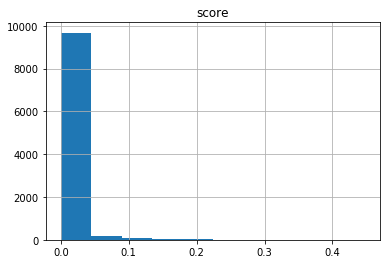

In [7]:
import matplotlib.pyplot as plt
#histogramme de score
result.hist(column='score')

affichage des resultats par author :



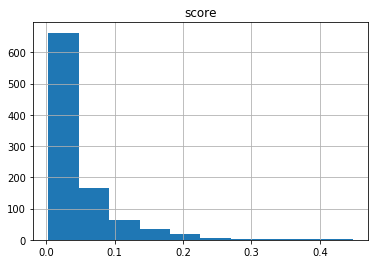

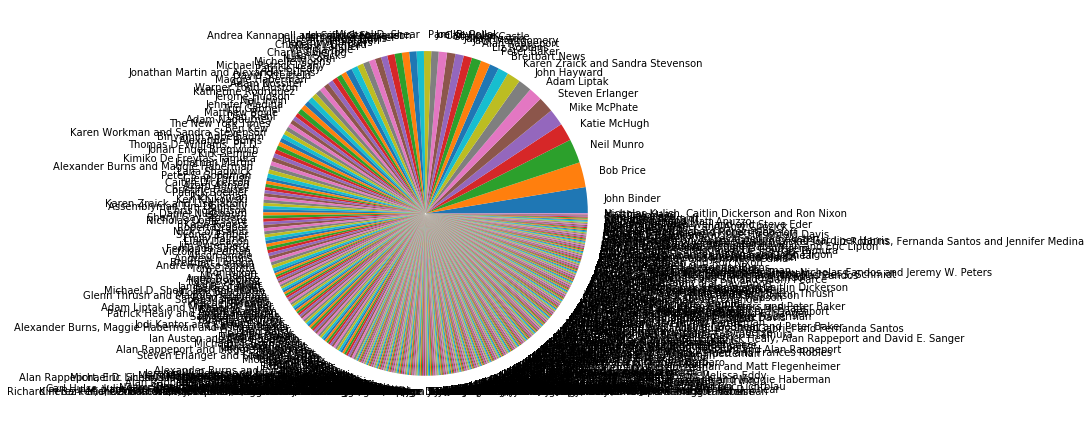

affichage des resultats par publication :



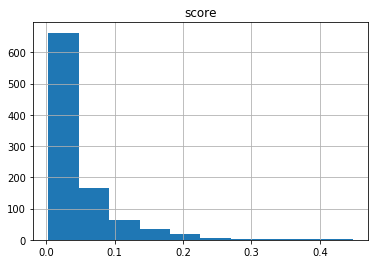

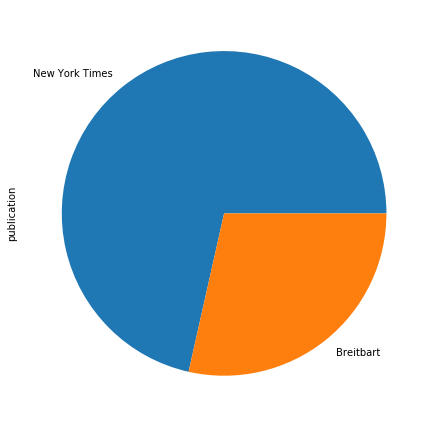

affichage des resultats par year :



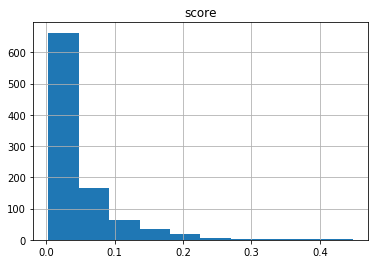

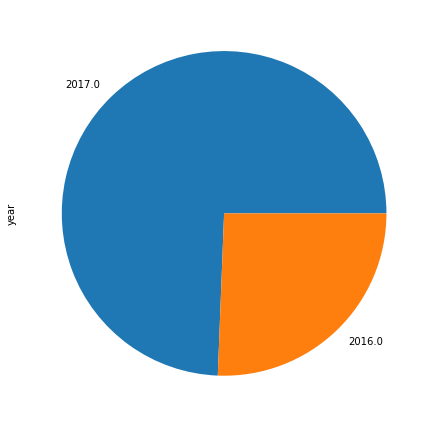

In [8]:

import matplotlib.pyplot as plt
def showstatistiques(good_result,affichage):
      good_result.hist(column='score')
      print("affichage des resultats par" , affichage ,":\n")
      plt.figure(figsize=(16,8))
      ax1 = plt.subplot(121, aspect='equal')
      # en peut choisir : author / publication / year / month / language / country 
      good_result[affichage].value_counts().plot.pie()
      plt.show()  

good_result=result[result['score']>0]      
showstatistiques(good_result,'author')
showstatistiques(good_result,'publication')
showstatistiques(good_result, 'year')


Pour la partie  suivant on va essayer d'afficher des résultats selon l'emplacement géographique.

Jordan
Kuwait
Ghana
Mexico
France
Germany
Russia
Brazil


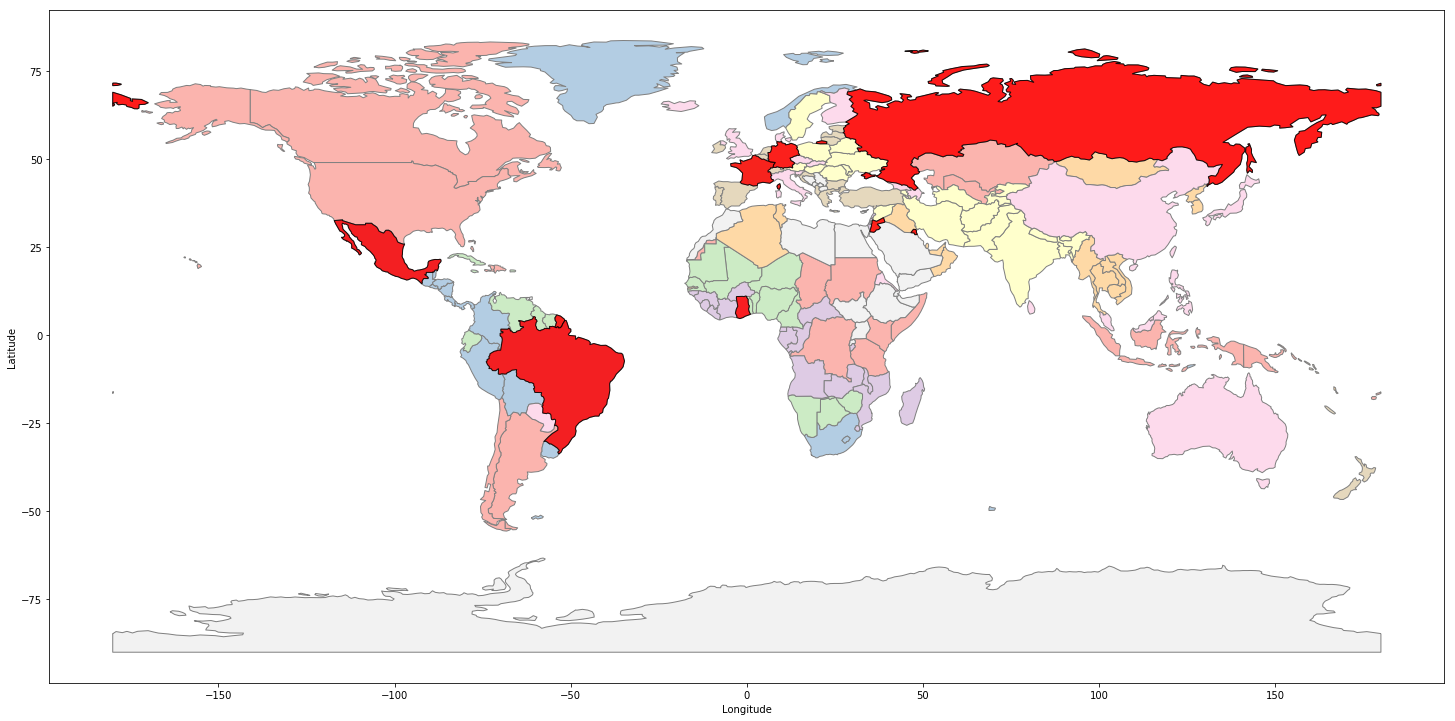

In [15]:

import geopandas as gpd
import matplotlib.pyplot as plt
from descartes import PolygonPatch



#exemple du format du data des articles 
s = {'id': [1, 2 ,3 ,4 ,5 ,6,7,8,9,10,11,12,13,14,15],
'country': ["Jordan", "Kuwait" ,"Ghana","Mexico","France","Germany","Ghana","Mexico","Mexico","France","Germany","Russia","Brazil","Brazil","Ghana"]}
artic=pd.DataFrame(data=s)
#freq=list(articles.groupby('country').count())
SS=[list(artic.groupby('country')['country'].transform('count')), artic['country'].tolist()]
keys = SS[1]
values =SS[0]
dictio = dict(zip(keys, values))
#lecture from data
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities.head()





#affichage
#result=cities[cities['country']=="morocco"]
#fig, ax = plt.subplots(1, 1, figsize=(15, 15))
#ax.set_aspect('equal')
#world.plot(ax=ax, color='white', edgecolor='black')
#result.plot(ax=ax, marker='o', color='red', markersize=20)
#ax.set_title('Carte avec geopandas');   



def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

# plot the whole world
#ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Africa'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')
ax2 = world.plot(figsize=(25,25), edgecolor=u'gray', cmap='Pastel1')

# then plot some countries on top
for x in dictio:
  print(x)
  plotCountryPatch(ax2, x , 'red')

# the place to plot additional vector data (points, lines)

plt.ylabel('Latitude')
plt.xlabel('Longitude')

#ax2.axis('scaled')
plt.show()

